## Problem Statement::

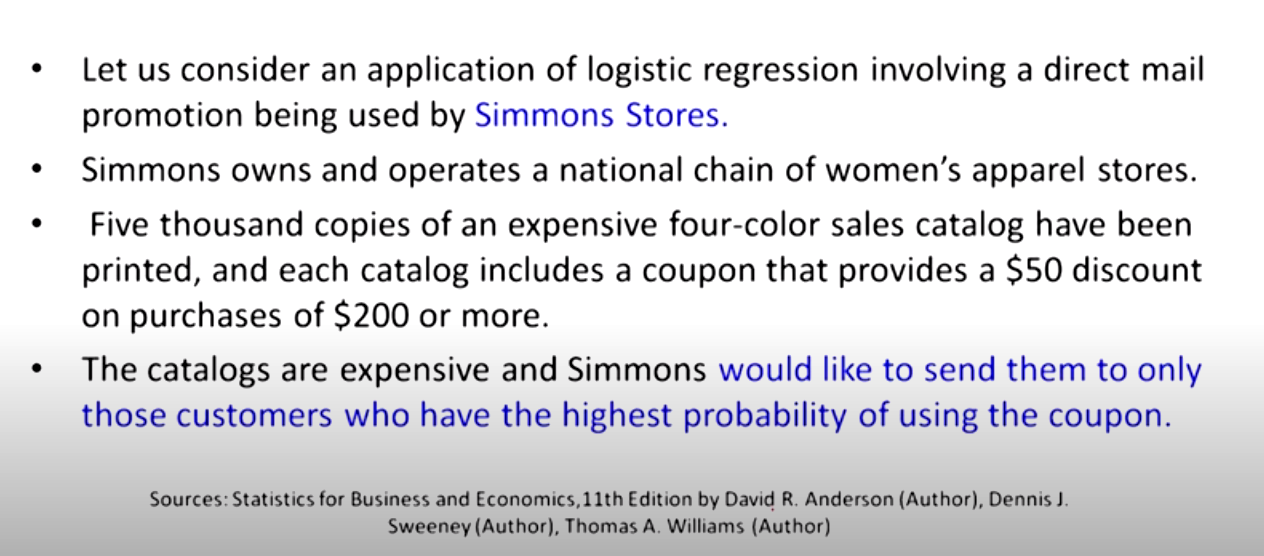

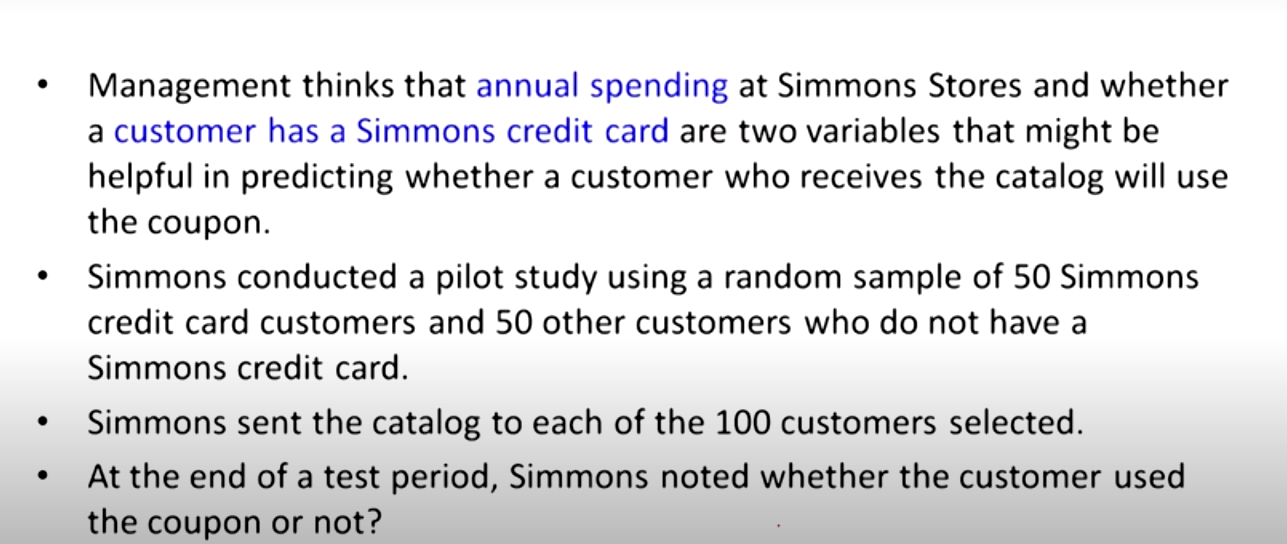

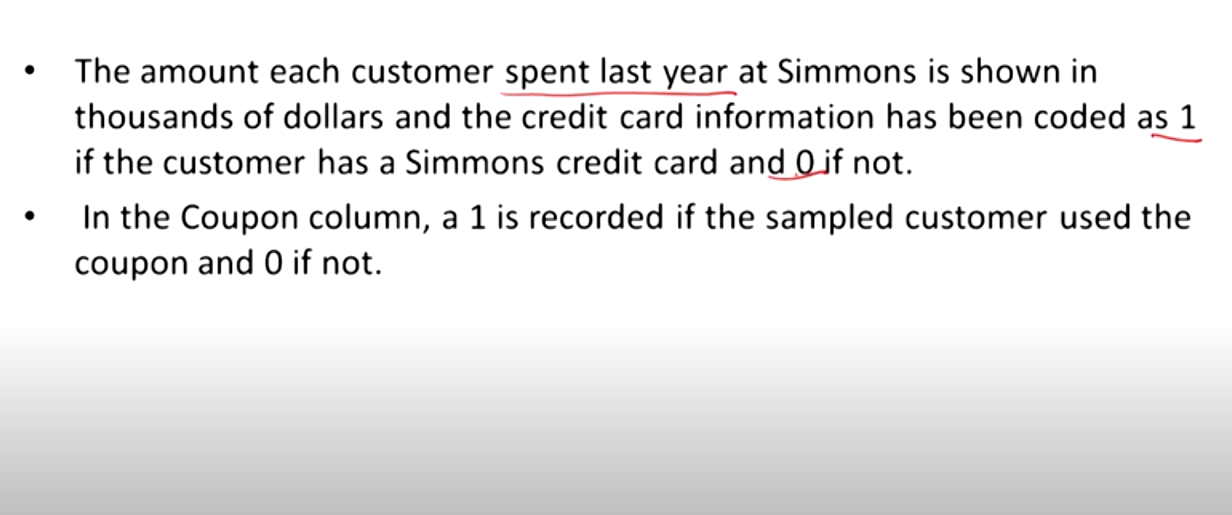

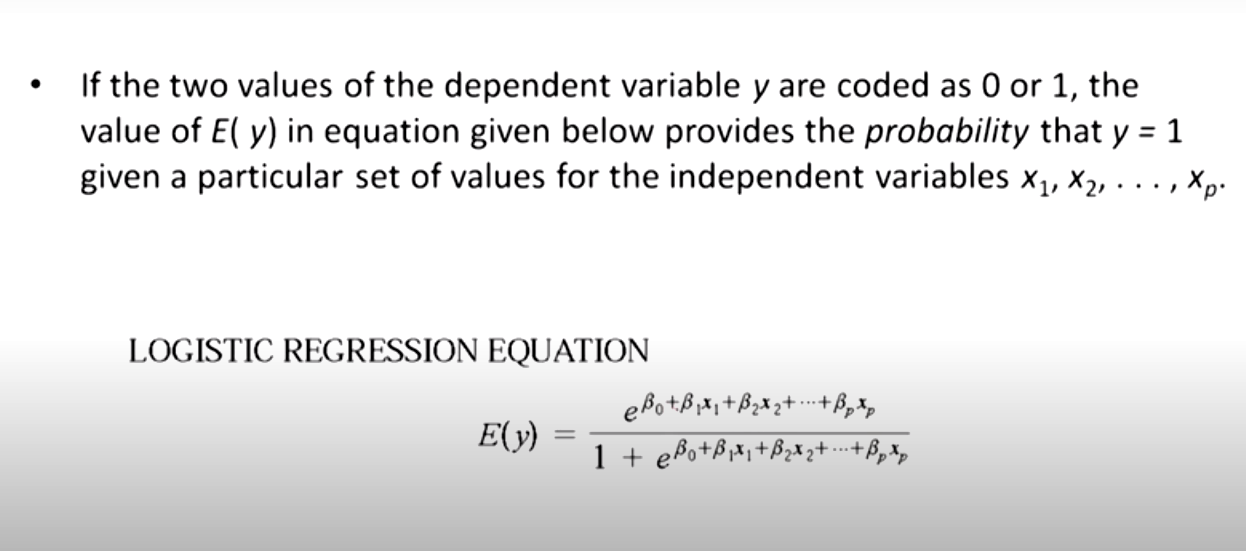

## So we have to deevlop a model which determines whether the customer uses the coupon or not?

## SOLUTION::

In [9]:
import pandas as pd

data = pd.read_excel('/home/ashish/projects/LogisticRegression_CouponUsage/Simmons.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    int64  
 1   Spending  100 non-null    float64
 2   Card      100 non-null    int64  
 3   Coupon    100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [11]:
data

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


Text(0, 0.5, '----Probability of coupon used---')

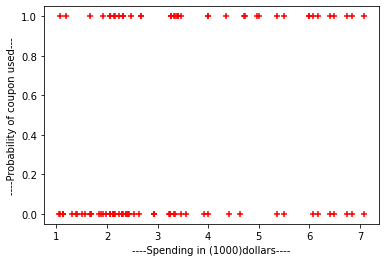

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data.Spending,data.Coupon,marker="+",color="red")
plt.xlabel("----Spending in (1000)dollars----")
plt.ylabel("----Probability of coupon used---")

## It is a S-Shaped curve not a normal distribution curve

In [14]:
x = data[['Spending','Card']]
y = data['Coupon']

import statsmodels.api as sm
x = sm.add_constant(x)
logit_model = sm.Logit(y,x).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Jan 2022   Pseudo R-squ.:                  0.1012
Time:                        20:59:54   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
Card           1.0987      0.445      2.471      0.013       0.227       1.970
==============================================================================
"""

## NOTE::
    1. In logistic Regression G-statistic is used to check the significance of overall model like linear regression uses F-statistic to check the significane of overall model.
    
    2. Also like linear regression uses t-test statistic to check individual independent variable significance, Similarly the logistic regression uses z-test OR wald's test to check the significance of individual independent variable.
    
    3. G-statistic = Log-Likelihood/LL-Null.

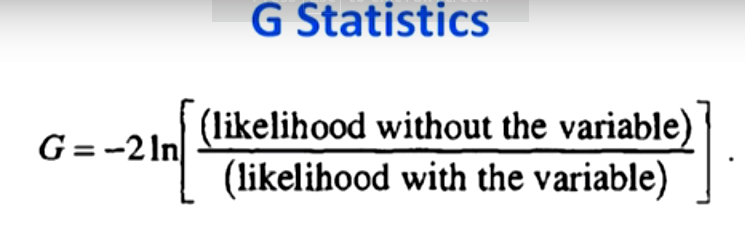

In [17]:
## Calculating  the G-stats from Logistic regression Summary Table
G_stats = -2*((-67.301)-(-60.487))
G_stats

13.628

In [18]:
import scipy
from scipy.stats import chi2

chi2.pdf(13.628,2)  ## degree of freedom = no. of independent varaibles = 2

0.000549145469075383

## Since
    chi2 = 0.000549 < alpha = 0.05 ==> OVERALL MODEL IS SIGNIFICANT.

## NOW, z-test/Wald test to test the significance of individual independent variables of the model.

In [19]:
## As it can be seen from the regression table that all independent variables 
## are also significant.

# ODDS RATIO ::  

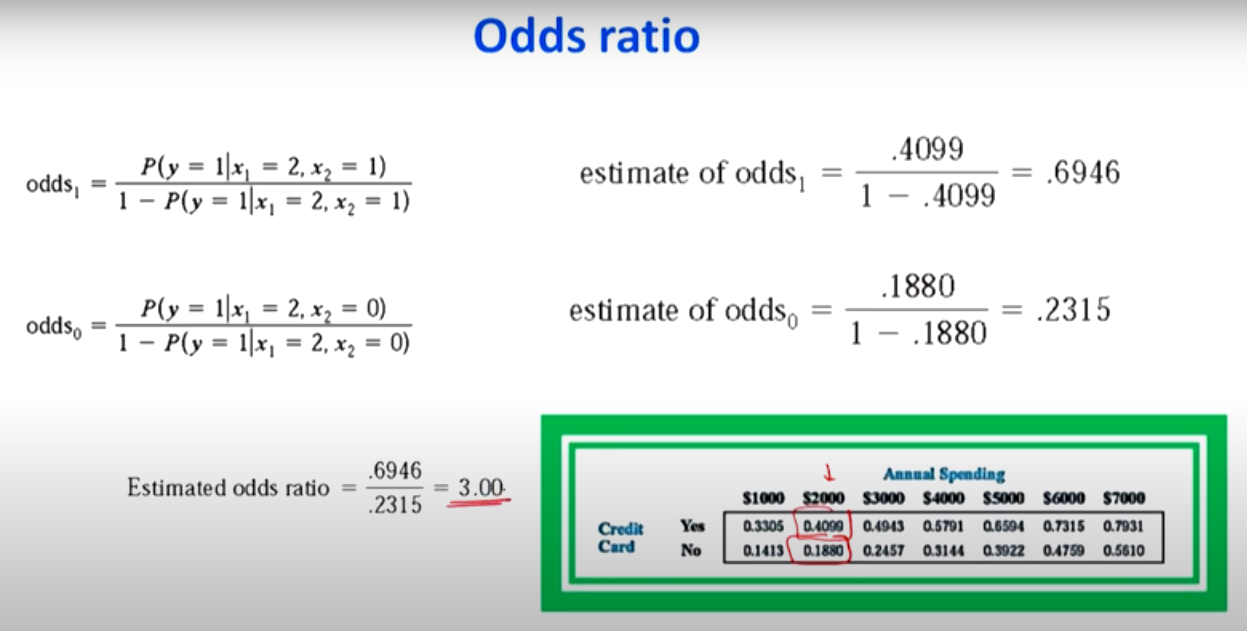

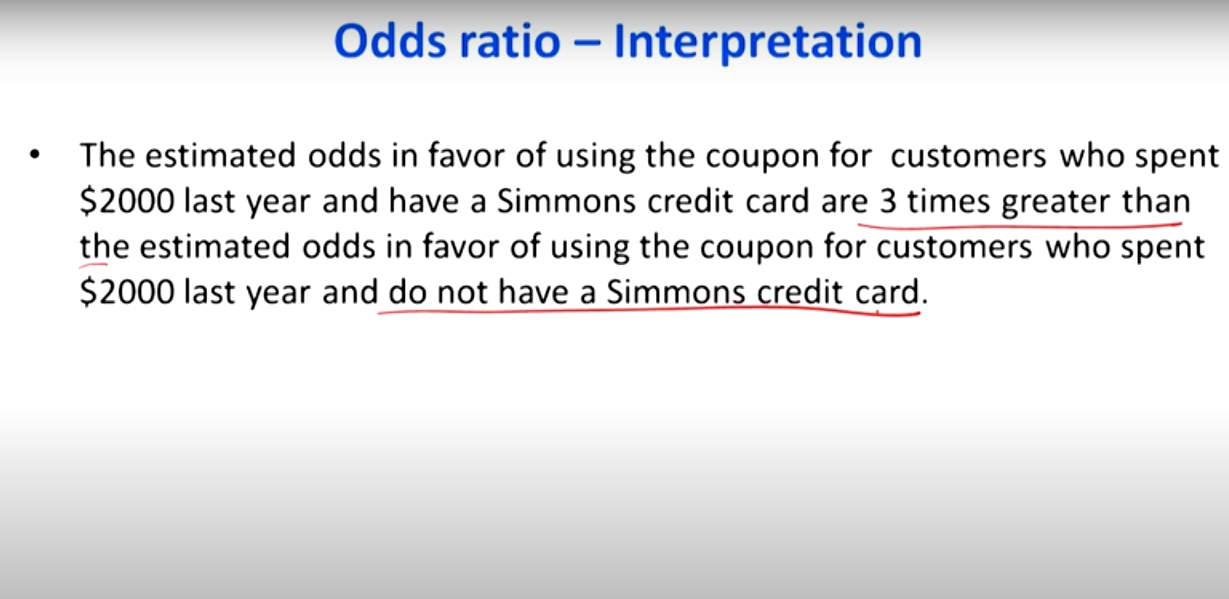

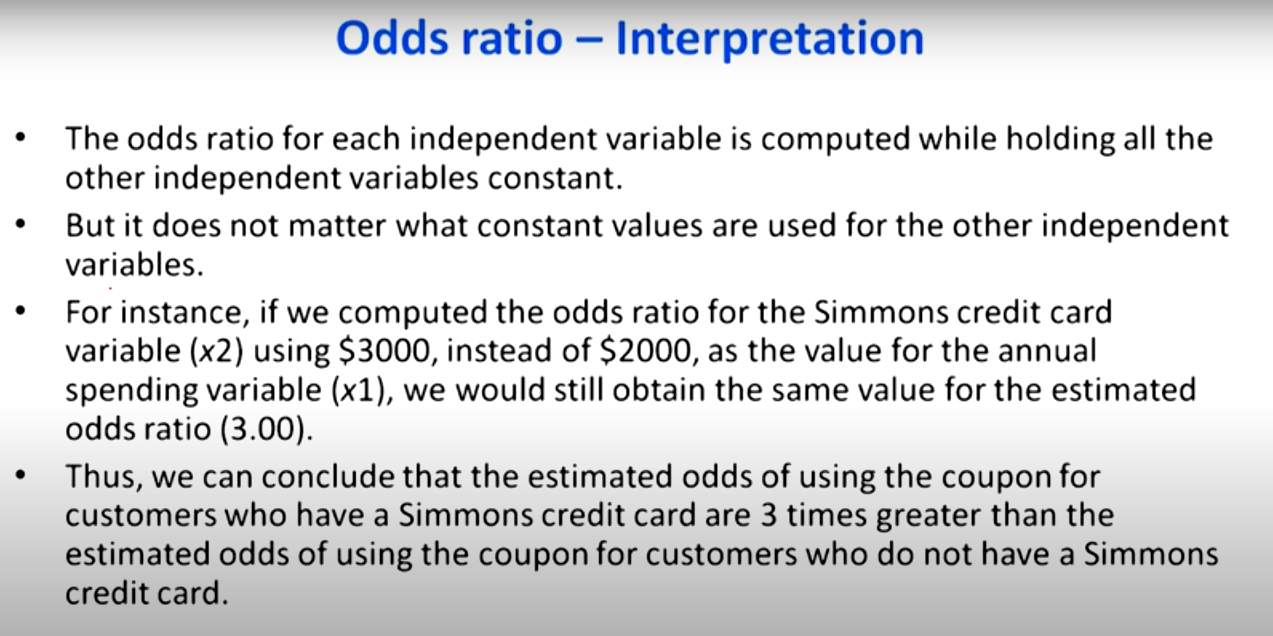

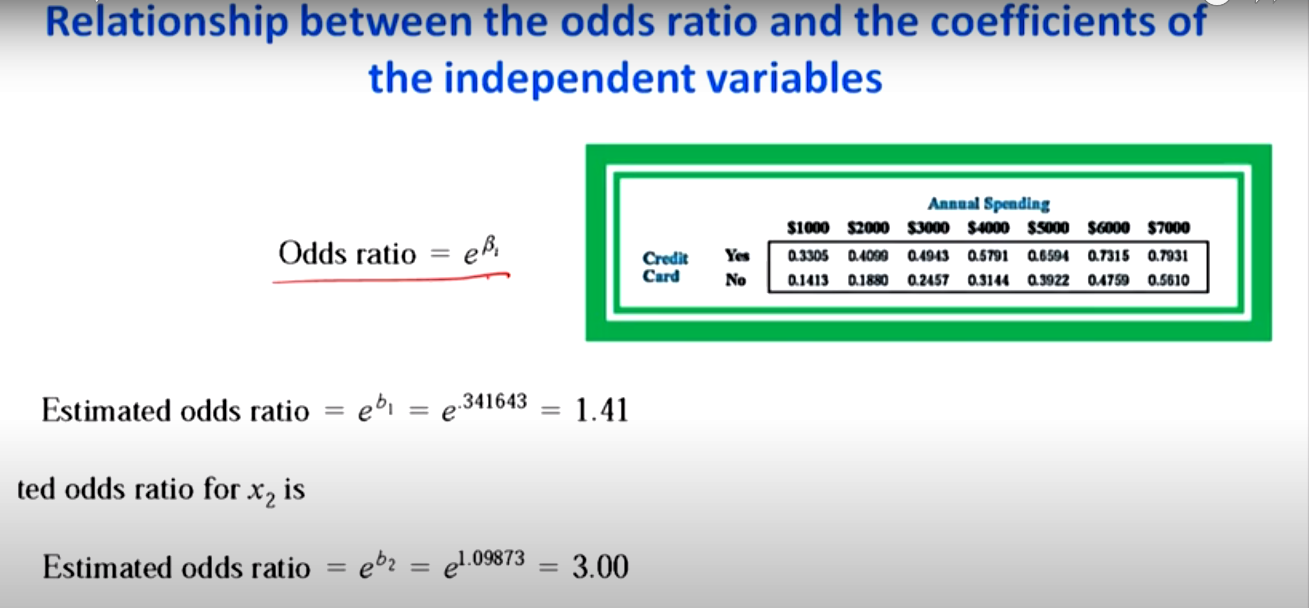

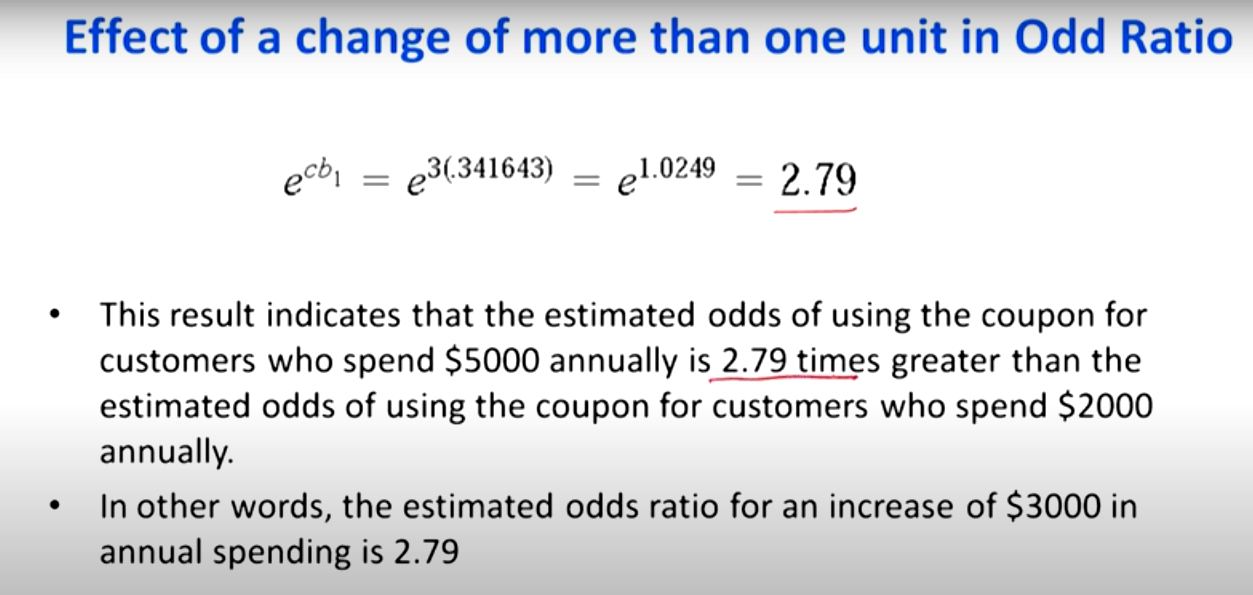